In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import defaultdict


In [3]:
table_data = pd.read_csv(
    "/data1/yejb/prosit/figure3/supply_origin/fine-tuned.csv")


In [4]:
def read_allele_len(data, allele):
    alleles = data[data['Allele'] == allele]
    baseline = alleles[alleles['SM_v2'].apply(
        lambda x: bool(x))]['Sequence'].to_list()
    prosit = alleles[alleles['Prosit'].apply(
        lambda x: bool(x))]['Sequence'].to_list()
    finetuned = alleles[alleles['Fine-tuned Prosit'].apply(
        lambda x: bool(x))]['Sequence'].to_list()
    return baseline, prosit, finetuned


def LSG(p1, p2):
    p1 = set(p1)
    p2 = set(p2)
    return p1 - p2, p1.intersection(p2), p2 - p1


In [5]:
all_alleles = table_data['Allele'].unique()
all_lsg = {}

for allele in all_alleles:
    _, p, f = read_allele_len(table_data, allele)
    l, s, g = LSG(p, f)
    all_lsg[allele] = (len(l), len(s), len(g))

all_lsg = [(k, v) for k, v in all_lsg.items()]
all_lsg = sorted(all_lsg, key=lambda x: x[1][1]+x[1][2])

In [6]:
def plot_alleles_lsg(all_lsg):
    c_loss = 'orange'
    c_shared = 'darkslateblue'
    c_gain = 'darkgreen'
    linewidth = 0.5
    barwidth = 0.9
    fig, ax = plt.subplots(figsize=(9, 6), dpi=100)

    alleles = [x[0] for x in all_lsg]
    losses = [-x[1][0] for x in all_lsg]
    shares = [x[1][1] for x in all_lsg]
    gains = [x[1][2] for x in all_lsg]
    x_ticks = list(range(len(alleles)))
    p1 = ax.bar(alleles, losses, barwidth, label="Loss",
                color=c_loss, linewidth=linewidth, edgecolor='black')
    p2 = ax.bar(alleles, shares, barwidth, label="Shared",
                color=c_shared, linewidth=linewidth, edgecolor='black')
    p3 = ax.bar(alleles, gains, barwidth, label="Gain", bottom=shares,
                color=c_gain, linewidth=linewidth, edgecolor='black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([1000 * i for i in range(8)])

    ax.axes.get_xaxis().set_visible(False)
    return fig, ax


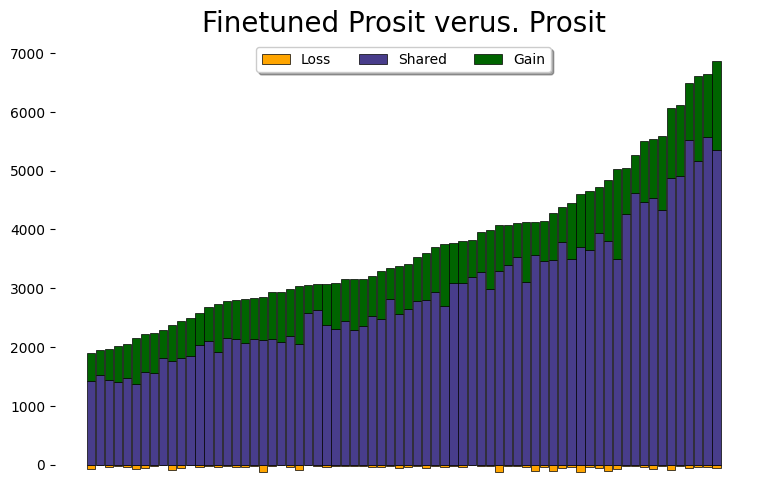

In [8]:
fig, ax = plot_alleles_lsg(all_lsg)
ax.set_title("Finetuned Prosit verus. Prosit", fontsize=20)
ax.legend(loc='upper center',
          fancybox=True, shadow=True, ncol=5)
fig.savefig("./figs/alleles-venn-fp-p.pdf", dpi=300,)


In [9]:
all_lsg = {}

for allele in all_alleles:
    b, _, f = read_allele_len(table_data, allele)
    l, s, g = LSG(b, f)
    all_lsg[allele] = (len(l), len(s), len(g))

all_lsg = [(k, v) for k, v in all_lsg.items()]
all_lsg = sorted(all_lsg, key=lambda x: x[1][1]+x[1][2])

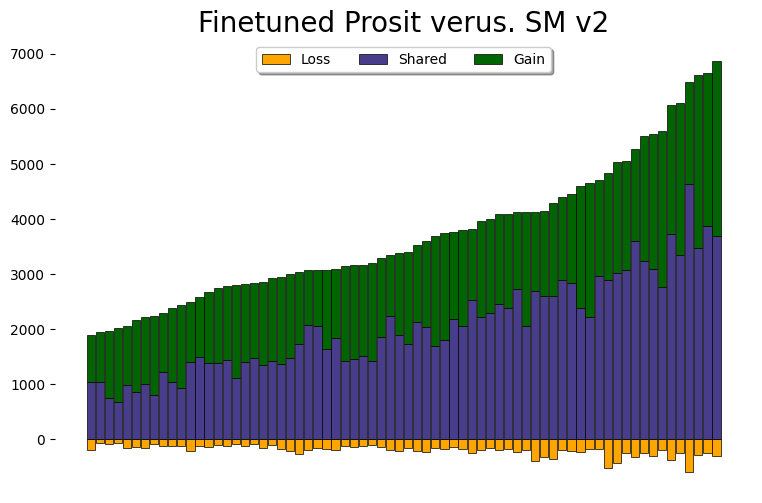

In [10]:
fig, ax = plot_alleles_lsg(all_lsg)
ax.set_title("Finetuned Prosit verus. SM v2", fontsize=20)
ax.legend(loc='upper center',
          fancybox=True, shadow=True, ncol=5)
fig.savefig("./figs/alleles-venn-fp-sm.pdf", dpi=300,)

In [11]:
all_lsg = {}

for allele in all_alleles:
    b, p, _ = read_allele_len(table_data, allele)
    l, s, g = LSG(b, p)
    all_lsg[allele] = (len(l), len(s), len(g))

all_lsg = [(k, v) for k, v in all_lsg.items()]
all_lsg = sorted(all_lsg, key=lambda x: x[1][1] + x[1][2])


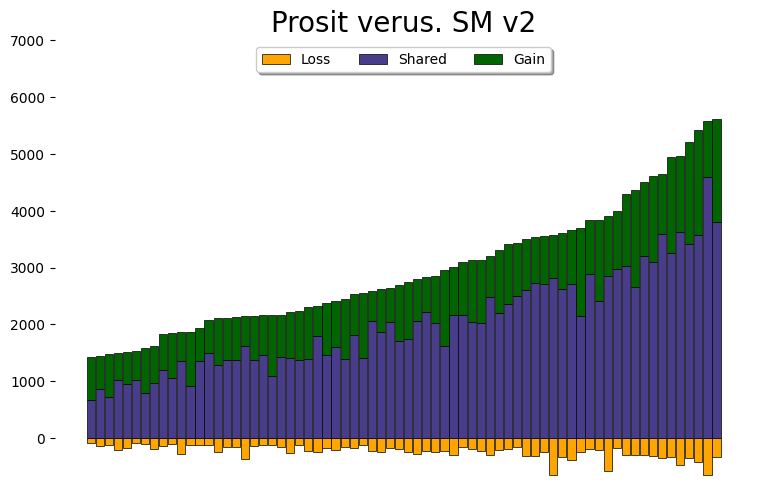

In [12]:
fig, ax = plot_alleles_lsg(all_lsg)
ax.set_title("Prosit verus. SM v2", fontsize=20)
ax.legend(loc='upper center',
          fancybox=True, shadow=True, ncol=5)
fig.savefig("./figs/alleles-venn-p-sv.pdf", dpi=300,)